## 어제 오늘 내 주식, 과연 내일은?

### 시계열 데이터 사례분석

#### 시계열 생성
첫 번째로 다루어볼 데이터는 `Daily Minimum Temperatures in Melbourne`입니다. 온도 변화를 다루는 시계열인 만큼 안정성이 있지 않을까요?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

print('슝=3')

슝=3


In [2]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/daily-min-temperatures.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [3]:
# 이번에는 Date를 index_col로 지정해 주었습니다. 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


시간 컬럼이 index가 되었지만 아직도 type은 DataFrame으로 나옵니다. 우리가 찾는 시계열은 바로 여기 있습니다.

In [4]:
ts1 = df['Temp']  # 우선은 데이터 확인용이니 time series 의 이니셜을 따서 'ts'라고 이름 붙여줍시다!
print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

### 시계열 안정성의 정성적 분석

이제 시계열이 준비되었으므로 시각화를 통해 안정성(Stationarity) 여부를 확인해 보겠습니다.

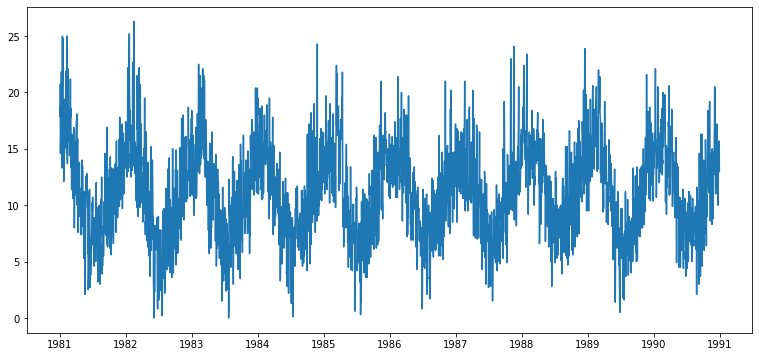

In [5]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts1)

In [6]:
# 시계열(Time Series)에서 결측치가 있는 부분만 Series로 출력합니다.
ts1[ts1.isna()] 

Series([], Name: Temp, dtype: float64)

결측치가 있다면 조치가 필요합니다. NaN이 들어있는 데이터는 통계분석 시에 많은 오류를 일으킬뿐더러 분석 결과에도 악영향을 미칠 것입니다.

만약 결측치가 있다면, 두 가지 방법으로 결측치를 처리해 줄 수 있습니다.

1. 결측치가 있는 데이터를 모두 삭제(drop)

2. 결측치 양옆의 값들을 이용해서 적절히 보간(interpolate)하여 대입
`ex) 2와 4 사이 데이터가 NaN이라면 이 값을 3으로 채우는 방식`

Series([], Name: Temp, dtype: float64)


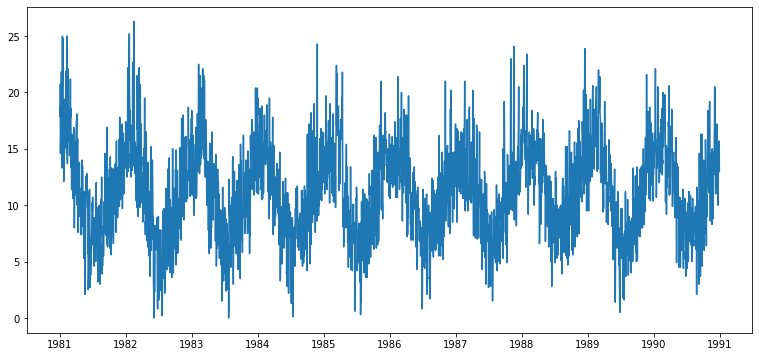

In [7]:
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts1=ts1.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인합니다.
print(ts1[ts1.isna()])

# 다시 그래프를 확인해봅시다!
plt.plot(ts1)

#### 아래는 일정 시간 내 `구간 통계치(Rolling Statistics)`를 시각화해 보는 함수입니다.

`현재 타임 스텝` 부터 `window에 주어진 타임 스텝 이전` 사이

1. 구간의 평균(rolling mean, 이동평균)과
2. 표준편차(rolling std, 이동표준편차)를

원본 시계열과 함께 시각화해 보면 좀 더 뚜렷한 경향성을 확인할 수 있을 것입니다.

In [8]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


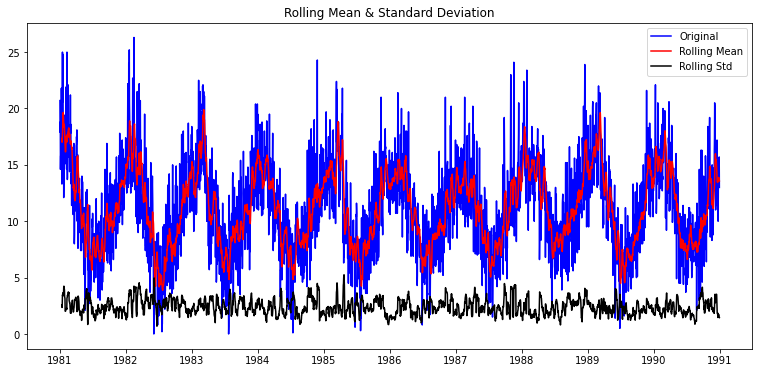

In [9]:
plot_rolling_statistics(ts1, window=12)

### 다른 데이터로도 비교해보기!

`International airline passengers` 데이터셋입니다. 월별 항공 승객 수(천명 단위)의 시계열 데이터입니다. 위와 동일한 방법으로 분석해 보겠습니다.

In [10]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/airline-passengers.csv' 
df = pd.read_csv(dataset_filepath, index_col='Month', parse_dates=True).fillna(0)  
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


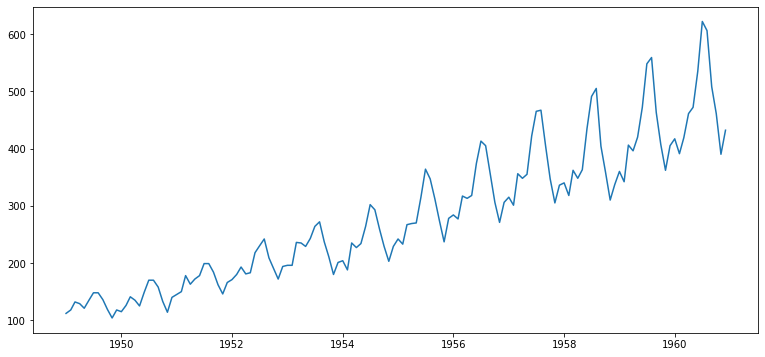

In [11]:
ts2 = df['Passengers']
plt.plot(ts2)

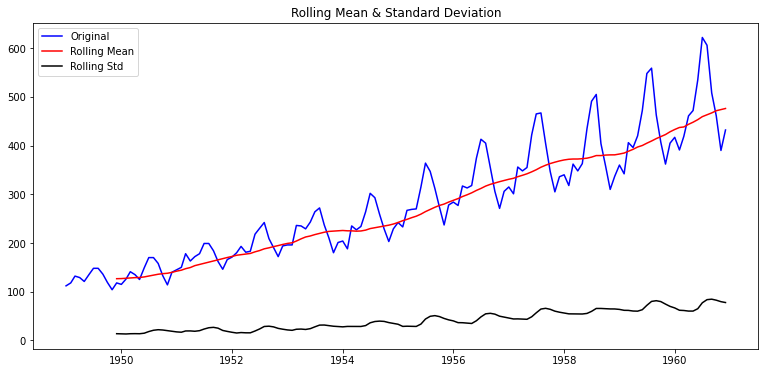

In [12]:
plot_rolling_statistics(ts2, window=12)

### Stationary 여부를 체크하는 통계적 방법

`Augmented Dickey-Fuller Test(ADF Test)`라는 시계열 데이터의 안정성(stationary)을 테스트하는 통계적 방법입니다

이 테스트는

1. `주어진 시계열 데이터가 안정적이지 않다`라는 귀무가설(Null Hypothesis)를 세운 후,
2. 통계적 가설 검정 과정을 통해 이 귀무가설이 기각될 경우에
3. `이 시계열 데이터가 안정적이다`라는 대립가설(Alternative Hypothesis)을 채택한다

#### 쉽게 요약해서 이해해보자! ( 귀무가설, 대립가설이란 ??)

ex) 우리나라 인구의 15%는 65세 이상이다. 라는 질문이 통계적으로 참일 경우 `귀무가설`이고, 참이 아닐 경우에는 반대되는 가설이 성립된다는 가정을 가지기 때문에 `대립가설`이라고 한다.

또, `p_value`의 정의는 귀무가설이 참이라고 가정했을 때 표본으로 얻어지는 통계치(평균 등)가 나타날 확률이다. p 값이 낮다면 표본 통계량이 우연히 나타나기 어려운 케이스이기 때문에 귀무가설이 아닌 `대립가설`을 채택한다고 한다.

- 결론은 p값이 낮다면 대립가설!

#### statsmodels 패키지와 adfuller 메서드

아래는 `statsmodels` 패키지에서 제공하는 `adfuller` 메서드를 이용해 주어진 timeseries에 대한 Augmented Dickey-Fuller Test를 수행하는 코드입니다.

In [13]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('슝=3')

슝=3


In [14]:
augmented_dickey_fuller_test(ts1)

Results of Dickey-Fuller Test:
Test Statistic                   -4.444805
p-value                           0.000247
#Lags Used                       20.000000
Number of Observations Used    3629.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64


ts1(Daily Minimum Temperatures in Melbourne)시계열이 안정적이지 않다는 귀무가설은 `p-value가 거의 0에 가깝게` 나타났습니다.

따라서 이 `귀무가설은 기각`되고, 이 `시계열은 안정적 시계열이라는 대립가설이 채택`됩니다.



In [15]:
augmented_dickey_fuller_test(ts2)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


ts2(International airline passengers) 시계열이 안정적이지 않다는 귀무가설은 `p-value가 거의 1에 가깝게` 나타났습니다.

p-value가 1에 가깝다는 것이 이 귀무가설(주어진 시계열 데이터가 안정적이지 않다.) 이 옳다는 직접적인 증거는 아닙니다.

하지만 이 귀무가설을 기각할 수는 없게 되었으므로 이 `시계열이 안정적인 시계열이라고 말할 수는 없습니다.`

### Stationary하게 만들 방법은 없을까?

1. 정성적인 분석을 통해 보다 안정적(starionary)인 특성을 가지도록 `기존의 시계열 데이터를 가공/변형`하는 시도
2. `시계열 분해(Time series decomposition)` 기법을 적용

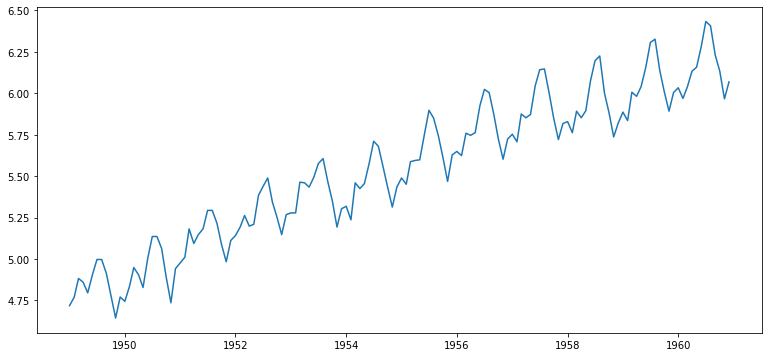

In [16]:
# 로그함수 변환

ts_log = np.log(ts2)
plt.plot(ts_log)

In [17]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


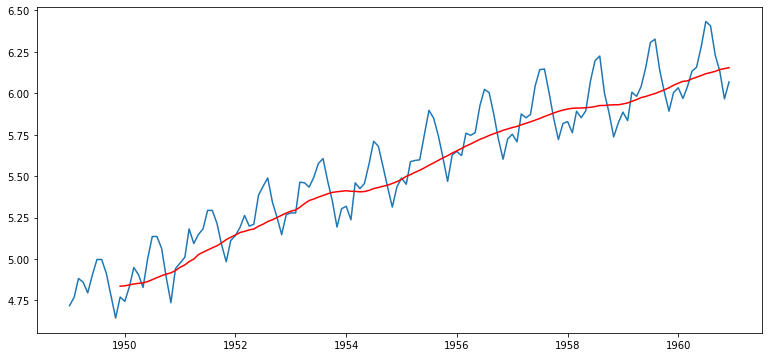

In [18]:
# Moving average 제거 - 추세(Trend) 상쇄하기

moving_avg = ts_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [19]:
ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
ts_log_moving_avg.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: Passengers, dtype: float64

In [20]:
# 이 결측치들은 향후 Dicky-Fuller Test 시에 에러를 발생시킬 
# 것이므로 이를 데이터셋에서 제거해 줍니다.

ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
1951-02-01    0.045965
Name: Passengers, dtype: float64

이제 이전 스텝에서 정의했던 메서드들을 활용하여 ts_log_moving_avg를 정성, 정량적으로 분석해 봅시다.

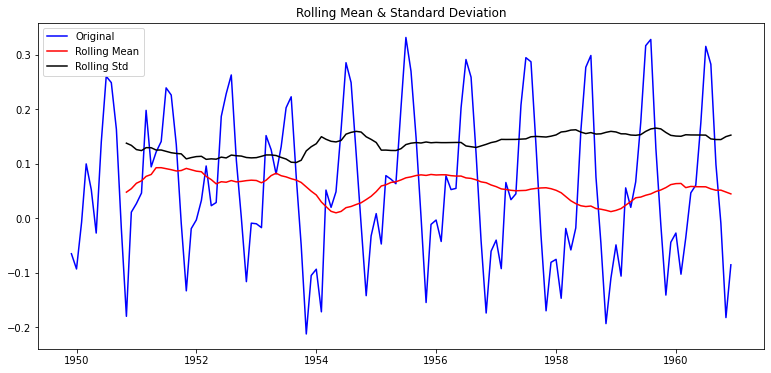

In [21]:
plot_rolling_statistics(ts_log_moving_avg)

In [22]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [23]:
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)
print('슝=3')

슝=3


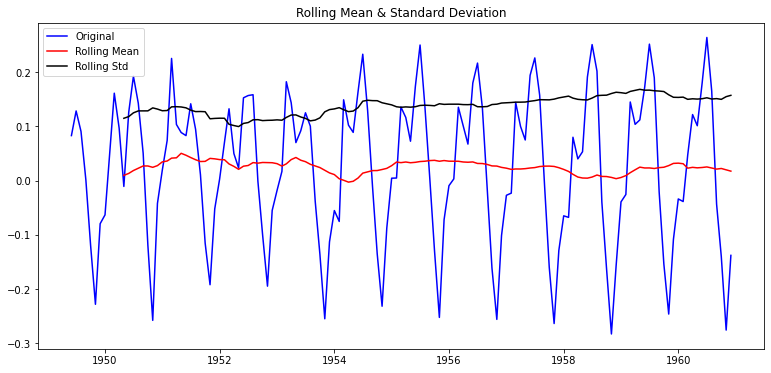

In [24]:
plot_rolling_statistics(ts_log_moving_avg_6)

#### 차분(Differencing) - 계절성(Seasonality) 상쇄하기


Trend에는 잡히지 않지만 시계열 데이터 안에 포함된 `패턴이 파악되지 않은 주기적 변화`는 예측에 방해가 되는 불안정성 요소입니다. 이것은 Moving Average 제거로는 상쇄되지 않는 효과입니다. 이런 계절적, 주기적 패턴을 계절성(Seasonality)라고 합니다.

이런 패턴을 상쇄하기 위해 효과적인 방법에는 차분(Differencing)이 있습니다.

시계열을 한 스텝 앞으로 시프트한 시계열을 원래 시계열에 빼 주는 방법입니다. 이렇게 되면 남은 것은 현재 스텝 값 - 직전 스텝 값이 되어 정확히 `이번 스텝에서 발생한 변화량`을 의미하게 됩니다.

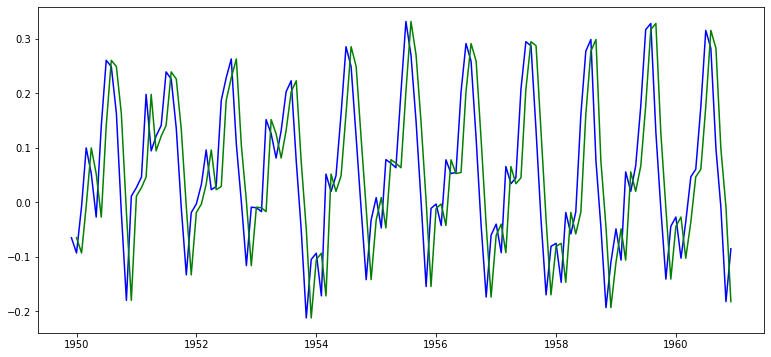

In [25]:
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

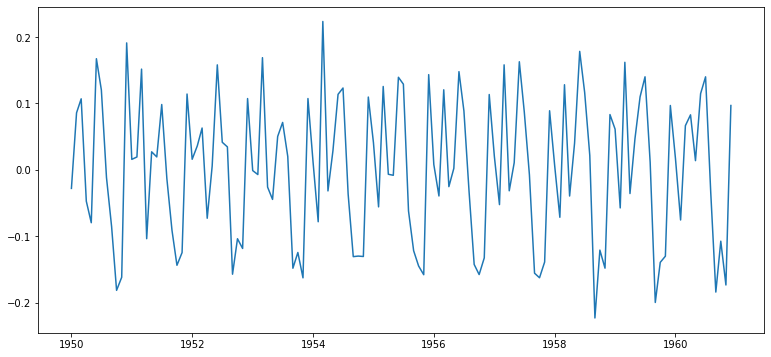

In [26]:
# 원본 시계열에서 시프트한 시계열을 뺀 값을 그래프로 표현해 봅시다.

ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

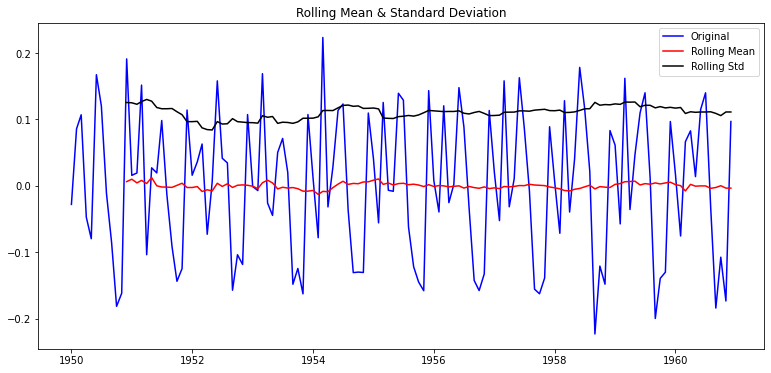

In [27]:
# 이동평균과, 이동표준편차를 그래프에 나타내어 정성적으로 
# 안정성(stationary) 여부를 파악해 봅시다.

plot_rolling_statistics(ts_log_moving_avg_diff)

In [28]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -3.912981
p-value                          0.001941
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


이동평균을 빼 주어 추세(Trend)를 제거하고 난 시계열에다가 1차 차분(1st order differencing)을 적용하여 Seasonality 효과를 다소 상쇄한 결과, p-value가 약 0.022 에서 0.0019로 1/10 정도로 줄었습니다.

데이터에 따라서는 2차 차분(2nd order differencing, 차분의 차분), 3차 차분(3rd order differencing, 2차 차분의 차분)을 적용하면 더욱 p-value를 낮출 수 있을지도 모릅니다.



### 시계열 분해(Time series decomposition)

statsmodels 라이브러리 안에는 `seasonal_decompose` 메서드를 통해 시계열 안에 존재하는 trend, seasonality를 직접 분리해 낼 수 있는 기능이 있습니다. 이 기능을 활용하면 우리가 위에서 직접 수행했던 moving average 제거, differencing 등을 거치지 않고도 훨씬 안정적인 시계열을 분리해 낼 수 있게 됩니다. 이번에는 위에서 구했던 로그 변환 단계(ts_log)에서부터 출발해 봅시다.

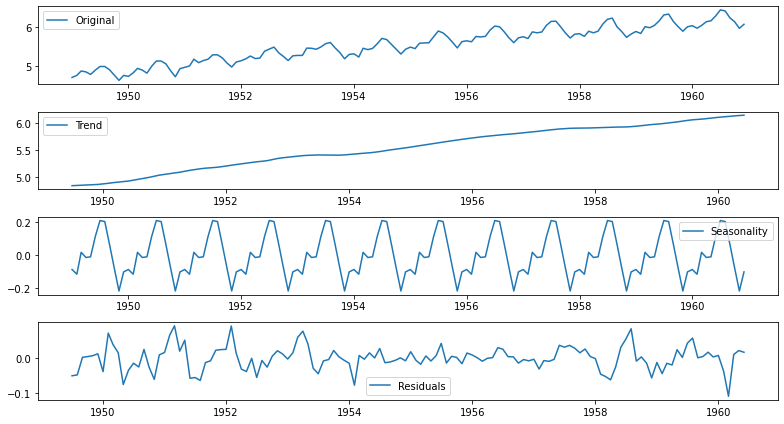

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Original 시계열에서 Trend와 Seasonality를 제거하고 난 나머지를 Residual이라고 합니다.

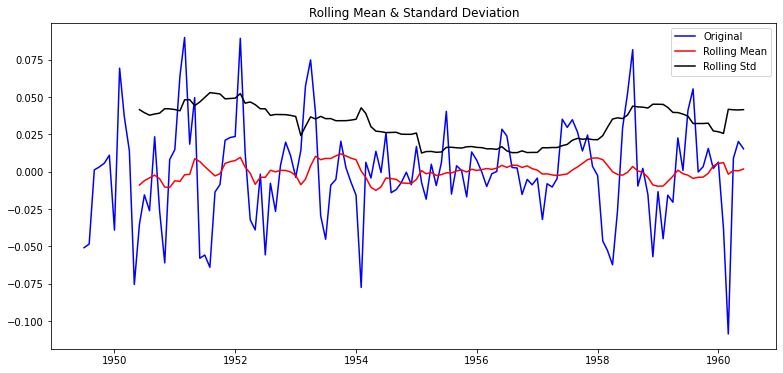

In [30]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [31]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


`Decomposing`을 통해 얻어진 `Residual`은 압도적으로 낮은 `p-value`를 보여 줍니다. 이 정도면 확실히 예측 가능한 수준의 안정적인 시계열이 얻어졌다고 볼 수 있겠습니다. 어쩌면 굳이 애써 직접 Trend, Seasonality를 제거하려고 애쓸 필요가 없이 바로 `Time Series Decomposing`을 시도하는 게 더 낫지 않았을까요? 물론 그렇긴 합니다만, 이렇게 `Trend`와 `Seasonality`를 제거해 주는 것이 어떤 효과를 발휘하게 되는지를 단계적으로 확인하는 과정이었다고 이해해 주시면 좋겠습니다.

## ARIMA 모델의 개념

trand와 Seasonality를 잘 분리하게 되면 Residual이 예측력 있는 안정적인 데이터가 된다고 한다. `ARIMA`를 사용하면 이 원리를 이용해 시계열 데이터 예측 모델을 자동으로 만들 수 있다.

`ARIMA`는 `AR(Autoregressive)` + `I(Integrated)` + `MA(Moving Average)` 라고 할 수 있다.

#### 1-1 AR(자기회기)

`AR`은 시계열의 `Residual(나머지)`에 해당하는 부분을 모델링한다고 볼 수 있습니다.

주식값이 항상 일정한 균형 수준을 유지할 것이라고 예측하는 관점이 바로 주식 시계열을 `AR`로 모델링하는 관점이라고 볼 수 있습니다.

#### 1-2 MA(이동평균)

`MA`는 시계열의 `Trend`에 해당하는 부분을 모델링한다고 볼 수 있습니다.

주식값이 최근의 증감 패턴을 지속할 것이라고 보는 관점이 `MA`로 모델링하는 관점이라고 볼 수 있습니다.

#### 1-3 I(차분 누적)

`I`는 Yt이 이전 데이터와 d차 차분의 누적(integration) 합이라고 보는 모델입니다.

`I`는 시계열의 `Seasonality`에 해당하는 부분을 모델링한다고 볼 수 있습니다.

#### 2. ARIMA 모델의 모수 p, q, d
`ARIMA`를 효과적으로 활용하기 위해서는 `ARIMA`의 모수(parameter)를 잘 설정해야 합니다. 핵심적인 숫자들을 잘 정해야 올바른 예측식을 구할 수 있다는 것이지요.

`ARIMA`의 모수는 아래의 3가지가 있습니다

`p` : 자기회귀 모형(AR)의 시차 <br/>
`d` : 차분 누적(I) 횟수 <br/>
`q` : 이동평균 모형(MA)의 시차

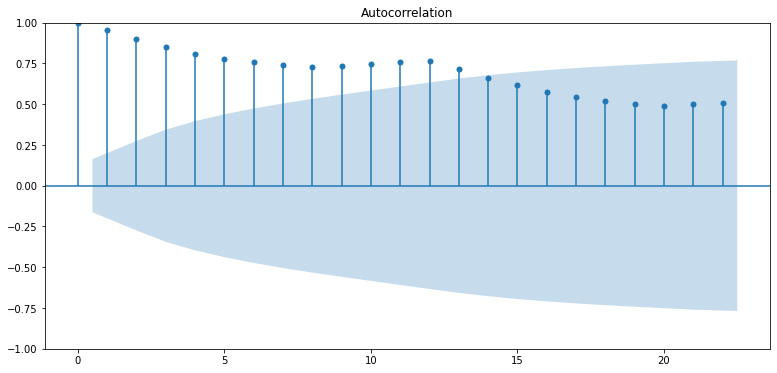

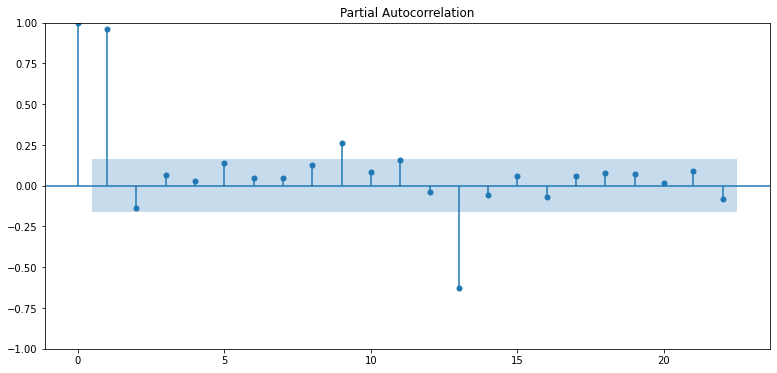

In [32]:
# statsmodels에서 제공하는 ACF와 PACF 플로팅 기능을 사용할 것입니다.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

        ar(p)          ma(q)
ACF |   점차적 감소 |  시차 q 이후 0    

PACF |  시차 p 이후 0  | 점차적 감소

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


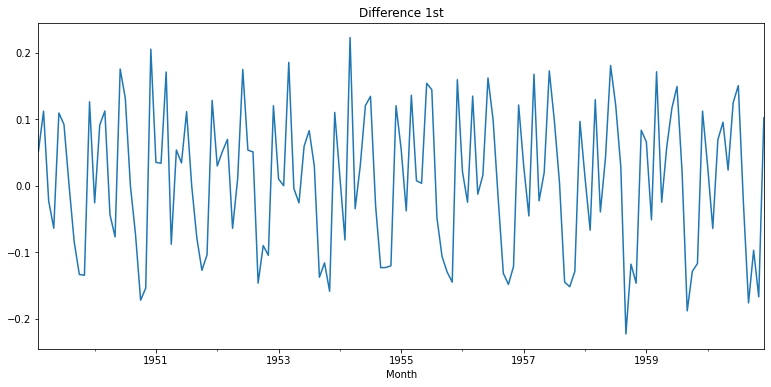

In [33]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


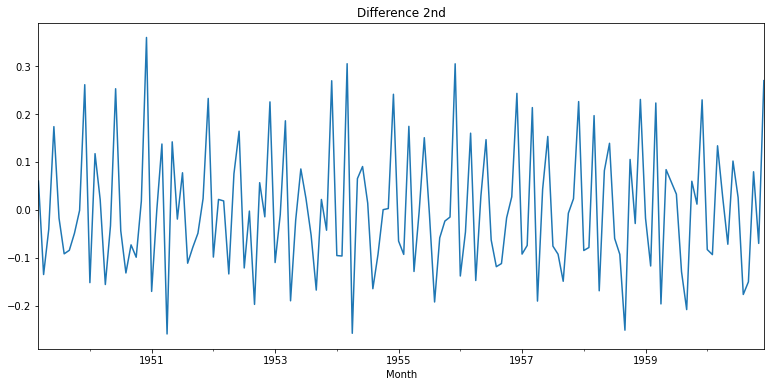

In [34]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

### 3. 학습 데이터 분리

아래와 같이 시계열 데이터에서 학습 데이터와 테스트 데이터를 분리해 봅시다. 분리 비율은 학습과 테스트에 9:1로 하겠습니다. 시계열 예측이니만큼 가장 나중 데이터를 테스트용으로 사용하는 것이 타당할 것입니다.

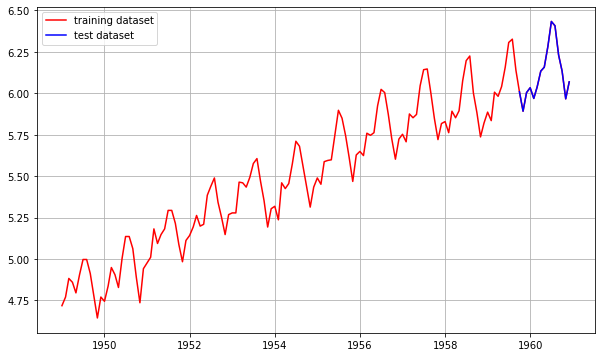

In [35]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [36]:
# 데이터셋의 형태를 확인해봅니다.

print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Month
1949-01-01    4.718499
1949-02-01    4.770685
Name: Passengers, dtype: float64
(129,)
(15,)


### ARIMA 모델 훈련과 추론

In [37]:
import warnings
warnings.filterwarnings('ignore') #경고 무시

from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(14, 1, 0)) # 모수는 이전 그래프를 참고 
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  129
Model:                ARIMA(14, 1, 0)   Log Likelihood                 219.951
Date:                Thu, 17 Feb 2022   AIC                           -409.902
Time:                        13:52:38   BIC                           -367.121
Sample:                    01-01-1949   HQIC                          -392.520
                         - 09-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2752      0.081     -3.387      0.001      -0.434      -0.116
ar.L2         -0.0124      0.109     -0.114      0.909      -0.225       0.200
ar.L3          0.0002      0.046      0.005      0.9

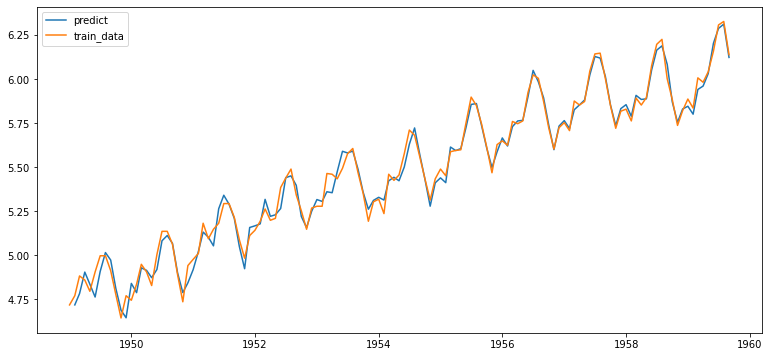

In [38]:
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

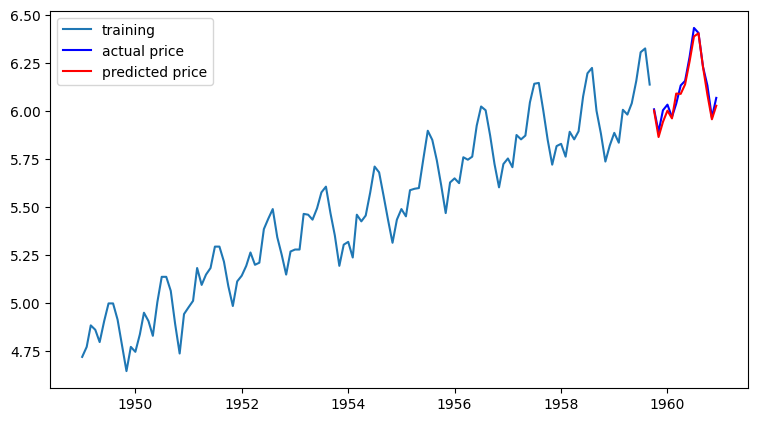

In [39]:
# forecast() 메소드를 이용해 테스트 데이터 구간의 데이터를 예측해 봅니다.

model = ARIMA(train_data, order=(14, 1, 0))  # p값을 14으로 테스트
fitted_m = model.fit() 
fc= fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [40]:
# np.exp()를 통해 전부 원본 스케일로 돌린 후 `MSE`, `MAE`, `RMSE`, `MAPE`를 계산합니다.

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  231.97320956929948
MAE:  12.424959605677085
RMSE:  15.230666747365314
MAPE: 2.74%


## 프로젝트 : 주식 예측에 도전해보자 !

##### 1단계 : 시계열 데이터 준비하기

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/005930.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2020-05-18    48800.0
2020-05-19    50300.0
2020-05-20    50000.0
2020-05-21    49950.0
2020-05-22    48750.0
Name: Close, dtype: float64

#### 2단계 : 각종 전처리 수행 (결측치 처리, 로그 변환 등)

In [42]:
# 결측치 처리

ts = ts.interpolate(method='time')

ts[ts.isna()]

Series([], Name: Close, dtype: float64)

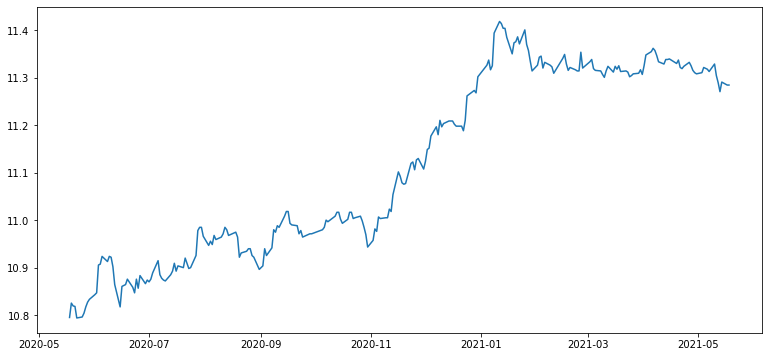

In [43]:
# 로그 변환
ts_log = np.log(ts)

plt.plot(ts_log)

#### 3단계 : 시계열 안정성 분석
 - 정성적 그래프 분석

 - 정량적 Augmented Dicky-Fuller Test (ADF Test)
 
 - 시계열 분해 (Time Series Decomposition)
 
 - Residual 안정성 확인

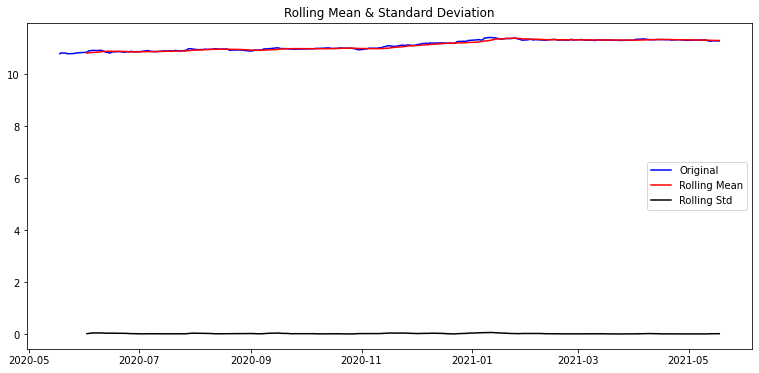

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


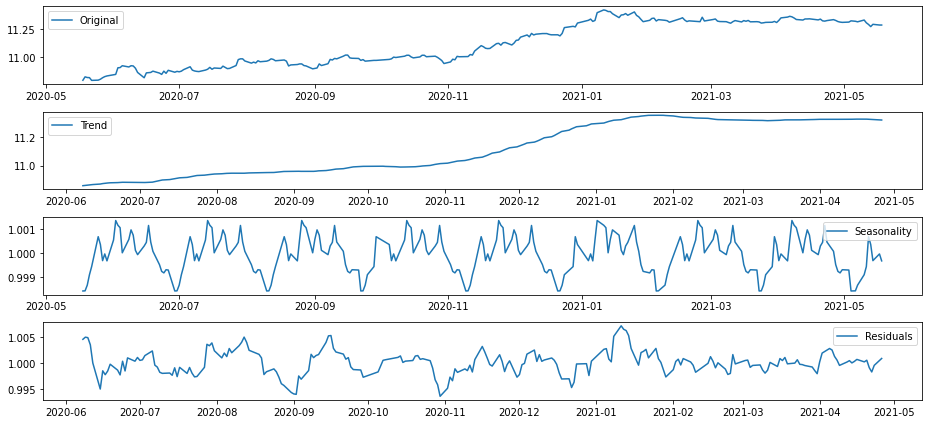

In [44]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

# 정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

# 시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period=30)

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [45]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.187586e+00
p-value                        6.234854e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


#### 4단계 : 학습, 테스트 데이터셋 생성

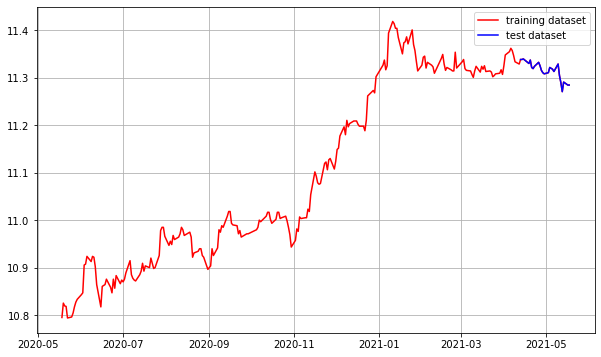

In [46]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

#### 5단계 : 적정 ARIMA 모수 찾기

- ACF, PACF 그려보기 -> p,q 구하기
- 차분 안정성 확인 -> d 구하기

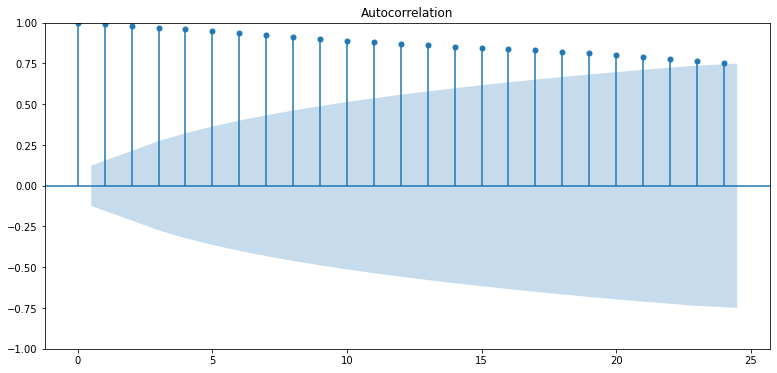

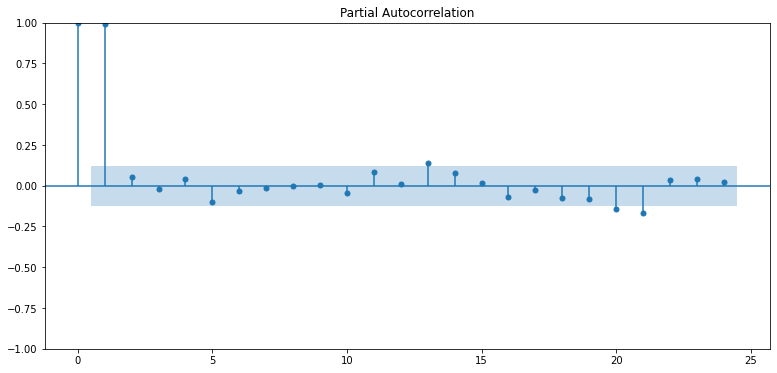

In [47]:
# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)
plot_pacf(ts_log)
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.553699e+01
p-value                        2.183738e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.029320e+01
p-value                        3.525823e-18
#Lags Used                     7.000000e+00
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457894e+00
Critical Value (5%)           -2.873659e+00
Critical Value (10%)          -2.573229e+00
dtype: float64


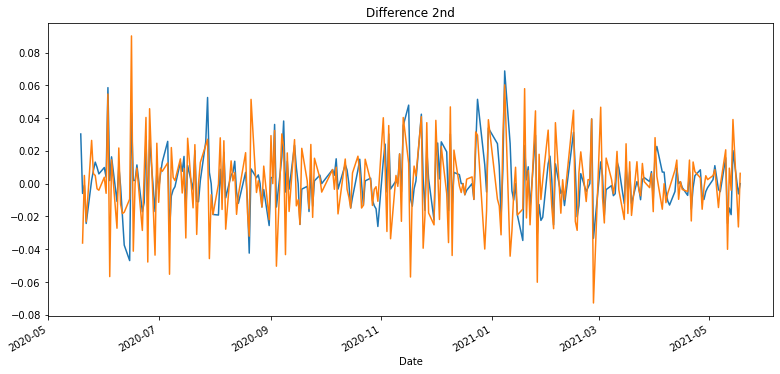

In [48]:
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

#### 6단계 : ARIMA 모델 훈련과 테스트

- ARIMA 모델 빌드와 훈련
- 모델 테스트 및 플로팅
- 최종 예측 모델 정확도 측정(MAPE)

In [49]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(2, 0, 1))
fitted_m = model.fit()

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 583.361
Date:                Thu, 17 Feb 2022   AIC                          -1156.722
Time:                        13:52:42   BIC                          -1139.642
Sample:                             0   HQIC                         -1149.828
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0896      0.129     86.277      0.000      10.838      11.342
ar.L1          0.7739      1.821      0.425      0.671      -2.796       4.344
ar.L2          0.2191      1.811      0.121      0.9

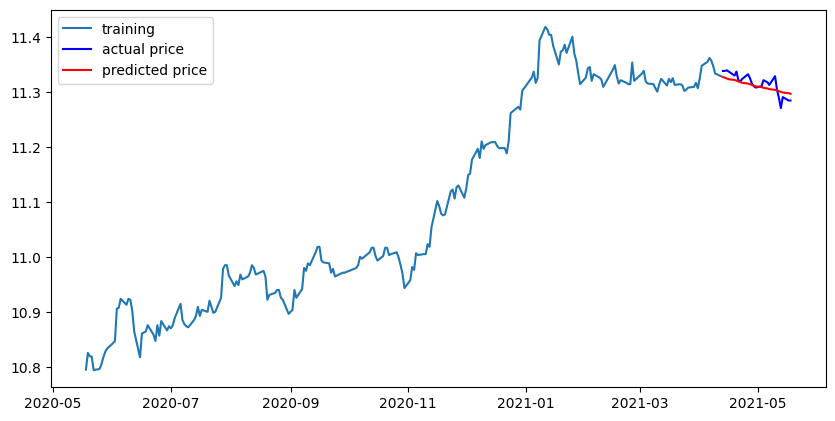

In [50]:
fc = fitted_m.forecast(len(test_data), alpha=0.05)
fc = np.array(fc)

fc_series = pd.Series(fc, index=test_data.index)

plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r', label='predicted price')
plt.legend()
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc)) # [[YOUR CODE]]
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc)) # [[YOUR CODE]]
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc))) # [[YOUR CODE]]
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data))) # [[YOUR CODE]]
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  1048973.6014239907
MAE:  843.7579531508708
RMSE:  1024.19412292006
MAPE: 1.03%


### 이번에는 테슬라 주식 예상해보기 !

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/TSLA.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2021-02-17    798.150024
2021-02-18    787.380005
2021-02-19    781.299988
2021-02-22    714.500000
2021-02-23    698.840027
Name: Close, dtype: float64

In [53]:
# 결측치 처리

ts = ts.interpolate(method='time')

ts[ts.isna()]

Series([], Name: Close, dtype: float64)

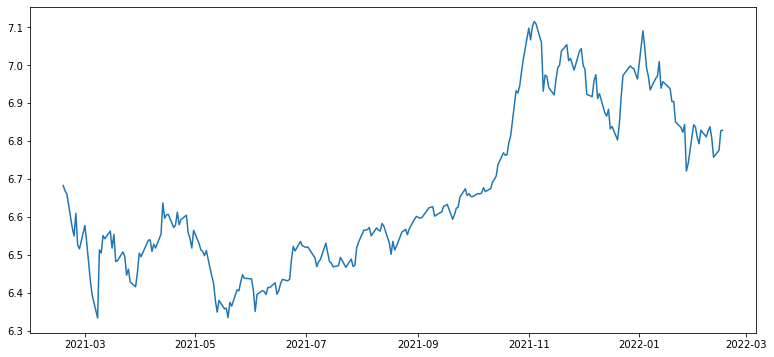

In [54]:
# 로그 변환
ts_log = np.log(ts)

plt.plot(ts_log)

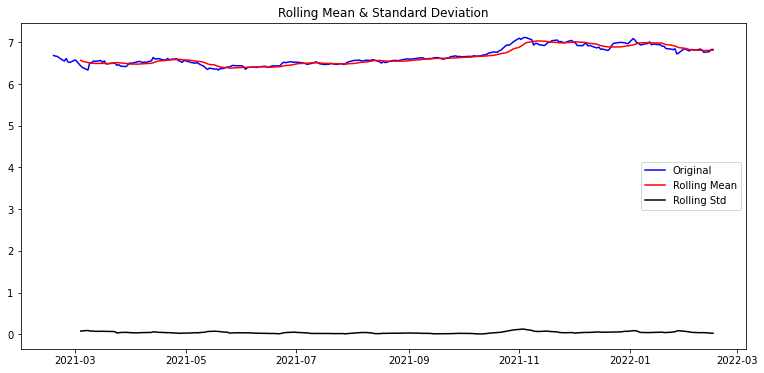

Results of Dickey-Fuller Test:
Test Statistic                  -1.253137
p-value                          0.650330
#Lags Used                       0.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64


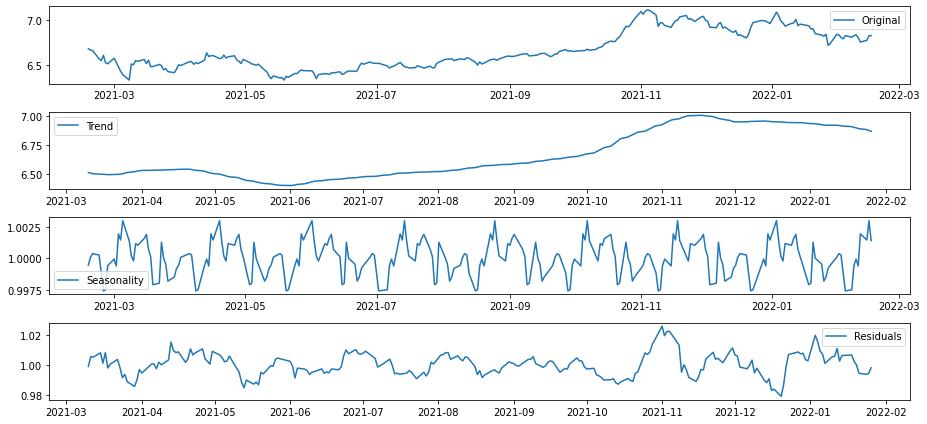

In [55]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

# 정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

# 시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period=30)

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [56]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.567501e+00
p-value                        8.089813e-09
#Lags Used                     7.000000e+00
Number of Observations Used    2.160000e+02
Critical Value (1%)           -3.460992e+00
Critical Value (5%)           -2.875016e+00
Critical Value (10%)          -2.573952e+00
dtype: float64


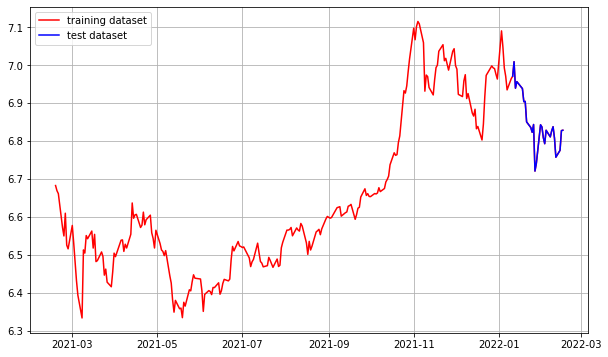

In [57]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

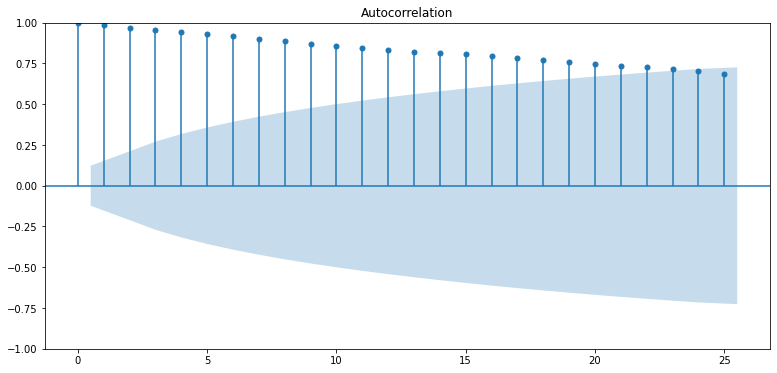

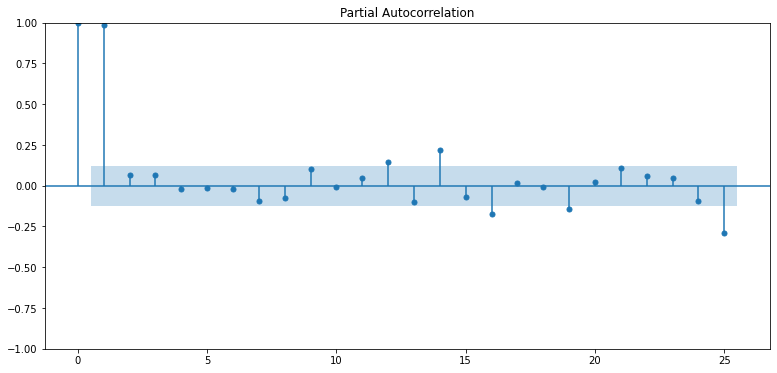

In [58]:
# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)
plot_pacf(ts_log)
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.683248e+01
p-value                        1.155026e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.520000e+02
Critical Value (1%)           -3.456569e+00
Critical Value (5%)           -2.873079e+00
Critical Value (10%)          -2.572919e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.198159e+00
p-value                        2.404162e-10
#Lags Used                     1.600000e+01
Number of Observations Used    2.350000e+02
Critical Value (1%)           -3.458487e+00
Critical Value (5%)           -2.873919e+00
Critical Value (10%)          -2.573367e+00
dtype: float64


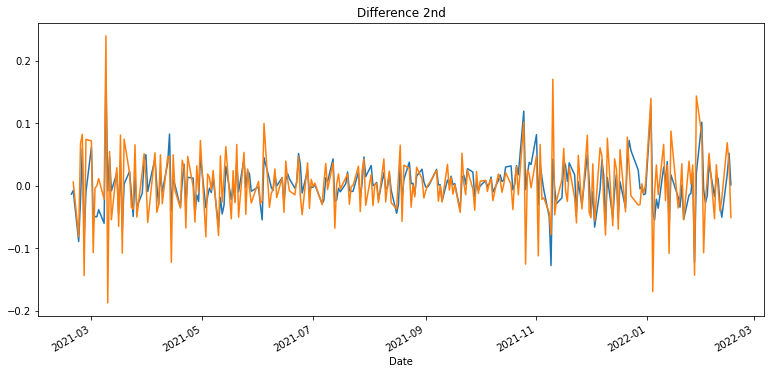

In [59]:
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

In [60]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(2, 0, 1))
fitted_m = model.fit()

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  228
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 439.981
Date:                Thu, 17 Feb 2022   AIC                           -869.962
Time:                        13:52:45   BIC                           -852.815
Sample:                             0   HQIC                          -863.044
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7104      0.172     39.053      0.000       6.374       7.047
ar.L1          0.7061      1.266      0.558      0.577      -1.774       3.187
ar.L2          0.2767      1.246      0.222      0.8

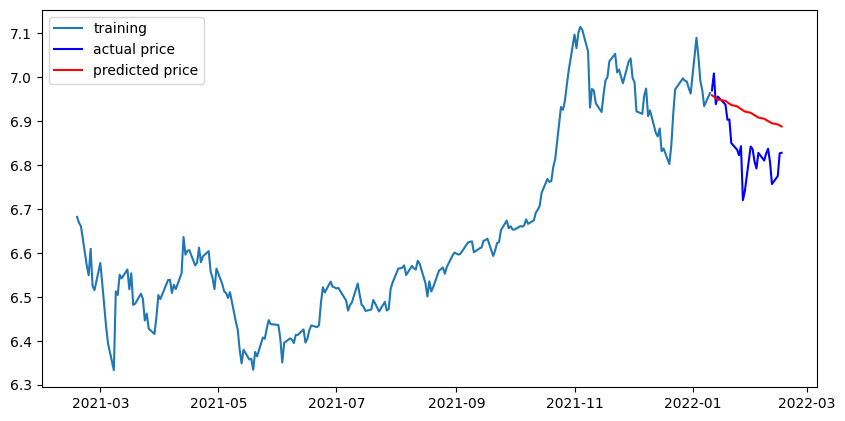

In [61]:
fc = fitted_m.forecast(len(test_data), alpha=0.05)
fc = np.array(fc)

# model = ARIMA(train_data, order=(14, 1, 0))  # p값을 14으로 테스트
# fitted_m = model.fit() 
# fc= fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

fc_series = pd.Series(fc, index=test_data.index)

plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r', label='predicted price')
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc)) # [[YOUR CODE]]
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc)) # [[YOUR CODE]]
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc))) # [[YOUR CODE]]
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data))) # [[YOUR CODE]]
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  7879.236198555315
MAE:  77.25328838683033
RMSE:  88.76506181237816
MAPE: 8.52%


##### p=2일 경우 8.52%정도 오류를 발생하게된다. 조금 수정을 해보도록 하겠다.

In [230]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(2, 0, 5))
fitted_m = model.fit()

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  228
Model:                 ARIMA(2, 0, 5)   Log Likelihood                 440.972
Date:                Thu, 17 Feb 2022   AIC                           -863.944
Time:                        14:43:49   BIC                           -833.080
Sample:                             0   HQIC                          -851.491
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7094      0.159     42.206      0.000       6.398       7.021
ar.L1          1.3447      0.908      1.482      0.138      -0.434       3.124
ar.L2         -0.3558      0.896     -0.397      0.6

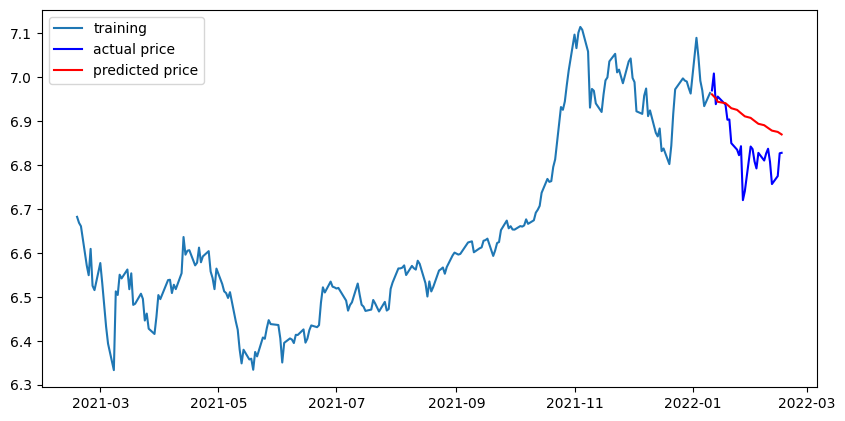

In [231]:
fc = fitted_m.forecast(len(test_data), alpha=0.05)
fc = np.array(fc)

fc_series = pd.Series(fc, index=test_data.index)

plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r', label='predicted price')
plt.legend()
plt.show()

In [74]:
# q = 3인 경우 mape loss율

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc)) # [[YOUR CODE]]
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc)) # [[YOUR CODE]]
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc))) # [[YOUR CODE]]
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data))) # [[YOUR CODE]]
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  6773.823569171204
MAE:  70.94032493647457
RMSE:  82.30324154716632
MAPE: 7.82%


In [77]:
# q = 5인 경우 mape loss율

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc)) # [[YOUR CODE]]
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc)) # [[YOUR CODE]]
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc))) # [[YOUR CODE]]
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data))) # [[YOUR CODE]]
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  6171.102016939055
MAE:  67.03861761133786
RMSE:  78.55636203986953
MAPE: 7.40%


In [80]:
# q = 10인 경우 mape loss율

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc)) # [[YOUR CODE]]
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc)) # [[YOUR CODE]]
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc))) # [[YOUR CODE]]
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data))) # [[YOUR CODE]]
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  13202.796581198703
MAE:  102.02255135566875
RMSE:  114.90342284370254
MAPE: 11.25%


In [83]:
# q = 8인 경우 mape loss율

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc)) # [[YOUR CODE]]
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc)) # [[YOUR CODE]]
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc))) # [[YOUR CODE]]
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data))) # [[YOUR CODE]]
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  10931.940111241713
MAE:  92.07295854924062
RMSE:  104.55591858542353
MAPE: 10.16%


In [86]:
# q = 6인 경우 mape loss율

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc)) # [[YOUR CODE]]
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc)) # [[YOUR CODE]]
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc))) # [[YOUR CODE]]
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data))) # [[YOUR CODE]]
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  11161.852502485573
MAE:  93.2537477216358
RMSE:  105.64966872870721
MAPE: 10.28%


In [207]:
# q = 10인 경우 mape loss율

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc)) # [[YOUR CODE]]
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc)) # [[YOUR CODE]]
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc))) # [[YOUR CODE]]
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data))) # [[YOUR CODE]]
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  7658.172426137423
MAE:  75.41892308303228
RMSE:  87.51098460271957
MAPE: 8.32%


In [216]:
# p=8, q=1인 경우 mape loss율

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc)) # [[YOUR CODE]]
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc)) # [[YOUR CODE]]
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc))) # [[YOUR CODE]]
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data))) # [[YOUR CODE]]
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  7440.712987027698
MAE:  74.40390933949381
RMSE:  86.25956751008955
MAPE: 8.21%


In [229]:
# p = 8인 경우 mape loss율

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc)) # [[YOUR CODE]]
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc)) # [[YOUR CODE]]
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc))) # [[YOUR CODE]]
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data))) # [[YOUR CODE]]
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  7440.712987027698
MAE:  74.40390933949381
RMSE:  86.25956751008955
MAPE: 8.21%


In [232]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(2, 0, 30))
fitted_m = model.fit()

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  228
Model:                ARIMA(2, 0, 30)   Log Likelihood                 461.384
Date:                Thu, 17 Feb 2022   AIC                           -854.768
Time:                        14:49:18   BIC                           -738.170
Sample:                             0   HQIC                          -807.724
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6646      0.083     80.295      0.000       6.502       6.827
ar.L1          0.4981      0.360      1.382      0.167      -0.208       1.204
ar.L2          0.1709      0.335      0.511      0.6

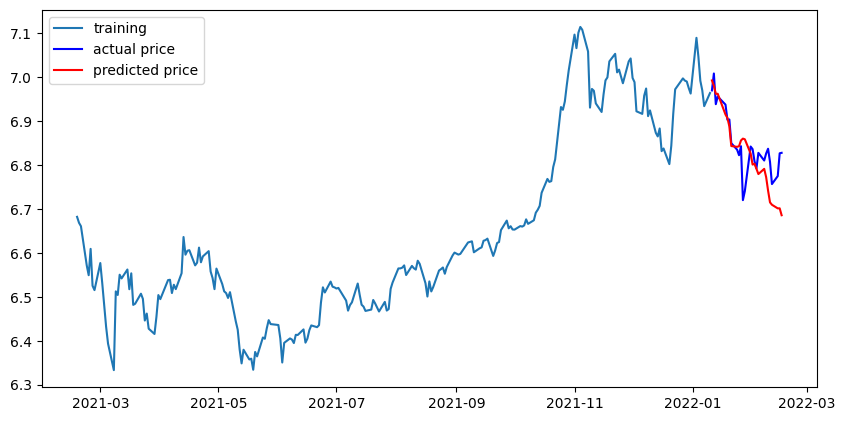

In [233]:
fc = fitted_m.forecast(len(test_data), alpha=0.05)
fc = np.array(fc)

fc_series = pd.Series(fc, index=test_data.index)

plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r', label='predicted price')
plt.legend()
plt.show()

In [234]:
# q = 10인 경우 mape loss율

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc)) # [[YOUR CODE]]
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc)) # [[YOUR CODE]]
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc))) # [[YOUR CODE]]
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data))) # [[YOUR CODE]]
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  3147.739729538919
MAE:  40.84090697134885
RMSE:  56.104721098486166
MAPE: 4.49%


회고 : 많은 수정을 통해 7.4%까지 오류율을 줄였지만 다소 아쉽다는 생각을 많이 하게 되었다. d 값을 늘리게 되면 이상하게도 그래프가 올라가는 경향을 보였다. 차수에서 나오는 어떠한 성질 때문에 결과값이 변화되는 것 같은데 이 부분에 대해서는 나중에 조금 알아보는 시간을 가지도록 해야겠다. 또 p와 q 값을 변화할 때마다 그래프가 올라갔다 내려갔다 하는 모습을 보게 되었다. p,q 값을 30 또는 40, 50까지 다양하게 올려보았지만 정확한 그래프를 나타내기에는 부족함이 있어 보였다. 하지만 어떤 특정 값에서는 높은 그래프 정확도를 보이고는 했다. 그래서 마지막으로 4.49%까지 줄일 수 있게 되었다. 하지만 그래프 예상 중간을 넘어서면서 그대로 쭉 내려가는 모습을 볼 수 있었다. 조금 더 값을 변경해보고 수정해보고 싶지만 시간이 없어서 여기까지 회고를 쓰도록 하겠다.

<br/>
시계열 데이터의 흐름과 분석만을 통해 이정도의 정확도를 나타낸다는게 정말 충격적이고 놀라운 사실이었다. 조금 더 다양한 보조 자료와 세부적인 분석을 더 사용한다면 정말로 앞으로의 흐름을 더 정확하게 나타낼 수 있을 것 같다. 정말 흥미로운 노드였다고 생각한다.